# 1. Import Packages and Define Functions

In [1]:
# Import some libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import sys
sys.path.insert(1, '/Users/brianmccabe/DataScience/Flatiron/mod5/Emoji_Analysis/Scripts/')
import config
import warnings
warnings.filterwarnings('ignore')



pd.set_option('display.max_columns', 300)

%matplotlib inline

In [2]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
import string
import scipy
import emoji
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brianmccabe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brianmccabe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brianmccabe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# we can define a function that removes stopwords 
def process_tweet(tweet):
    tweet = str(tweet).lower()
    tokens = nltk.word_tokenize(tweet)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords]
    return stopwords_removed

In [4]:
def remove_http(tweet):
    pattern = '((http|https)\w+\s\w+\s\w+\s\w+)'
    try:
        return tweet.replace(re.findall(pattern, tweet)[0][0], "")
    except:
        return tweet

In [5]:
def remove_username(tweet):
    try:
        p = '[\w\s]+(@\w+)'
        return tweet.replace(re.findall(p, tweet)[0], "")
    except:
        return tweet

In [6]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()

In [7]:
def clean_txt(tweet):
    tweet = remove_http(tweet)
    tweet = remove_username(tweet)
    tokens = process_tweet(tweet)
    return ' '.join([lemmatizer.lemmatize(w) for w in tokens])

In [8]:
#set stopwords and punctuations
stopwords = stopwords.words('english')
stopwords += list(string.punctuation)
stopwords += ["n't", "' '", "'re'","”","``","“","''","’","'s","'re","http","https"]

# 2. Load in Data from EDA Notebook

In [9]:
df_all = pd.read_csv("tweets_w_all_emojis_present_NEW.csv")

In [10]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20416 entries, 0 to 20415
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20416 non-null  object 
 1   tweet               20416 non-null  object 
 2   emoji               20352 non-null  object 
 3   unique_emoji_count  20415 non-null  float64
 4   sentiment_score     20414 non-null  float64
dtypes: float64(2), object(3)
memory usage: 797.6+ KB


In [11]:
df_all.head()

,Unnamed: 0,tweet,emoji,unique_emoji_count,sentiment_score
0,0,!! TODAY'S VOTE !!\n\n🗳 https://t.co/AKM1Fbo8X...,🗳👉🏻,3.0,0.0000
1,1,!👍🏼🤨..RIGHT-on! Anyone who thinks tRump WON’T ...,👍🏼🤨,3.0,0.0000
2,2,"""""Get yourself a Lover who looks at \nyou, t...",💌,1.0,0.8516
3,3,"""And then... Trump"" 🤦\n🔥🚒🔥🚒🔥🚒🔥\nLincoln Projec...",🤦🔥🚒🔥🚒🔥🚒🔥,3.0,-0.8625
4,5,"""but biden and trump are the same.."" 🙄🖕🏼 https...",🙄🖕🏼,3.0,0.0000


3. 

# 3. KMeans Clustering

### Lemmatize

In [12]:
# #apply above function to data

# processed_tweets = list(map(process_tweet, df_all.tweet))

In [13]:
# #create list with lemmatized output
# lemmatized_output = []

# for tweet in processed_tweets:
#     lemmed = ' '.join([lemmatizer.lemmatize(w) for w in tweet])
#     lemmatized_output.append(lemmed)

In [14]:
#change this to 'lemmatized_output' if you are including lemma (see above)
X = df_all.tweet.apply(clean_txt)

In [15]:
tfidf = TfidfVectorizer(ngram_range=(1,1))

tfidf_data_train_lem = tfidf.fit_transform(X)


tfidf_data_train_lem = pd.DataFrame(tfidf_data_train_lem.toarray(), columns=tfidf.vocabulary_.keys())



In [16]:
train_columns = tfidf_data_train_lem.columns
    
tfidf_data_train_lem = scipy.sparse.csr_matrix(tfidf_data_train_lem)

In [17]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

In [18]:
from sklearn.cluster import KMeans

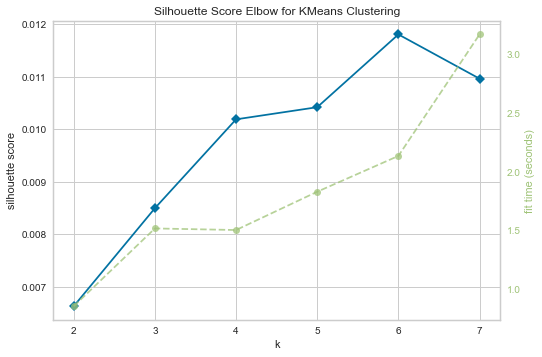

In [19]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette')

visualizer.fit(tfidf_data_train_lem)        # Fit the data to the visualizer
visualizer.show()

In [60]:
from sklearn.cluster import KMeans

In [61]:
kmeans = KMeans(n_clusters=4)

In [64]:
kmeans.fit(tfidf_data_train_lem)

KMeans()

In [67]:
predicted_clusters = kmeans.predict(tfidf_data_train_lem)

In [74]:
df_all['labels'] = predicted_clusters